In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df =pd.read_csv('/content/CustomerChurn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**SeniorCitizen is a categorical variable so 25-50-75 is inadequete.**




**75% customers have tenure less than 55 months.**

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
No,73.463013
Yes,26.536987


**Data is highly imbalanced ratio of 73% to 26%**

**So we analyze the data with other features while taking the target values seperately to get some insights**

Text(0.5, 1.0, 'Count of TARGET variable per category')

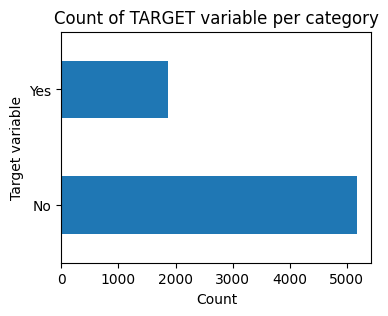

In [ ]:
df['Churn'].value_counts().plot(kind='barh',figsize=(4,3))
plt.xlabel("Count")
plt.ylabel("Target variable")
plt.title("Count of TARGET variable per category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DATA CLEANING


Text(0.5, 0, 'Column Names')

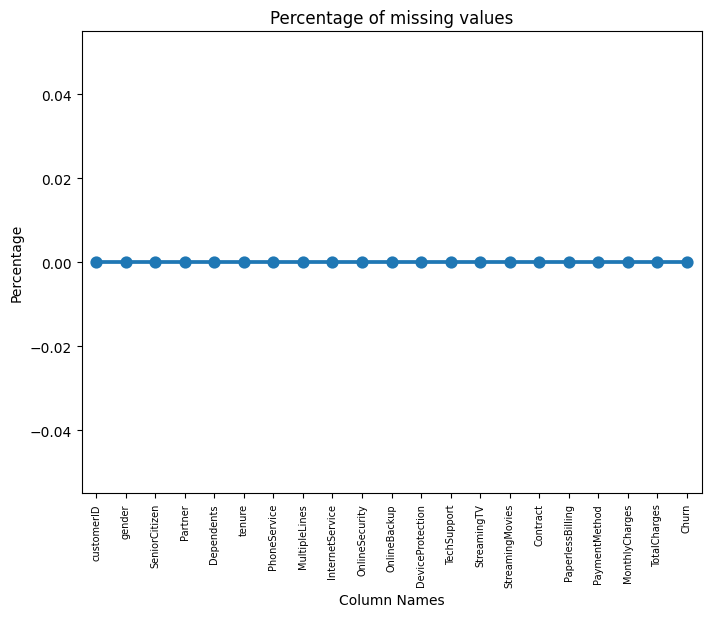

In [ ]:
miss = pd.DataFrame((df.isnull().sum()*100)/df.shape[0]).reset_index()
plt.figure(figsize=(8,6))
ax=sns.pointplot(x='index',y=0,data=miss)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")

In [ ]:
new=df.copy()

TotalCharges is an object so it should be converted to a numeric datatype
**bold text**

In [ ]:
new['TotalCharges']=pd.to_numeric(new['TotalCharges'],errors='coerce')

In [ ]:
new.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
new.loc[new['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Null values are only 0.15% so we can get rid of them for further actions.**

In [ ]:
new.dropna(how='any',inplace=True)

**As we have 2 continuous numeric attributes--Age & Tenure.**
**Now we will perform feature bining on Tenure & Divide Customers wrt their Tenure**

In [ ]:
new['tenure'].max()

72

FEATURE BINING

In [ ]:
labels = ['0-18','18-36','36-54','54-72']
bins = [0,18,36,54,72]

new['Tbins'] = pd.cut(new['tenure'],bins=bins,labels=labels,include_lowest=True)

In [ ]:
new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tbins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-18
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,18-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-18
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-54
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-18


In [ ]:
new[['Tbins','tenure']]

,Tbins,tenure
0,0-18,1
1,18-36,34
2,0-18,2
3,36-54,45
4,0-18,2
...,...,...
7038,18-36,24
7039,54-72,72
7040,0-18,11
7041,0-18,4


In [ ]:
new['Tbins'].value_counts()

,count
Tbins,
0-18,2723
54-72,1819
18-36,1308
36-54,1182


In [ ]:
new.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [ ]:
new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tbins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-18
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,18-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-18
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-54
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-18


DATA EXPLORING

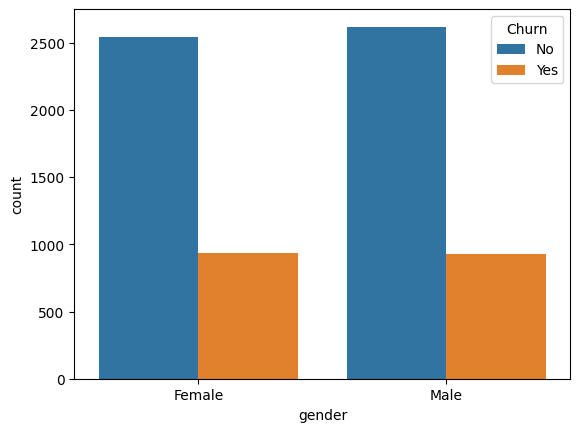

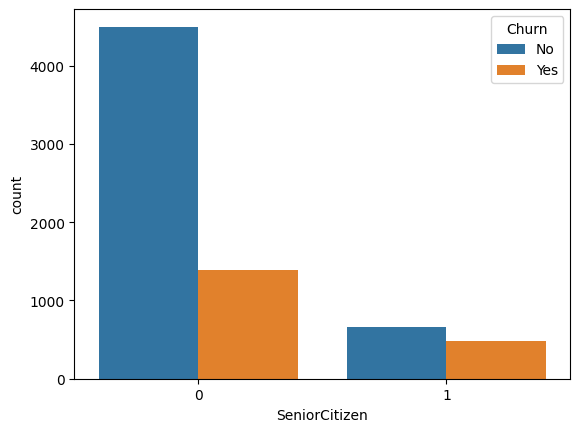

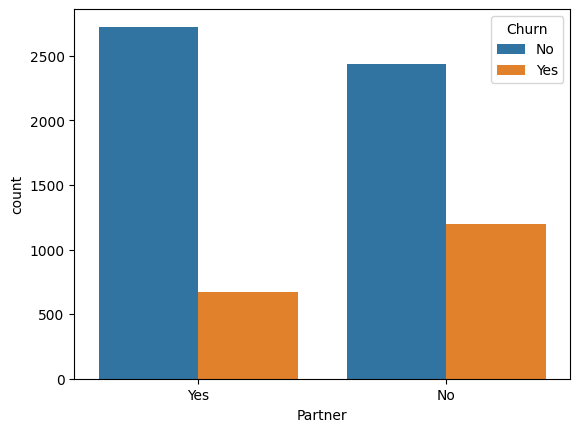

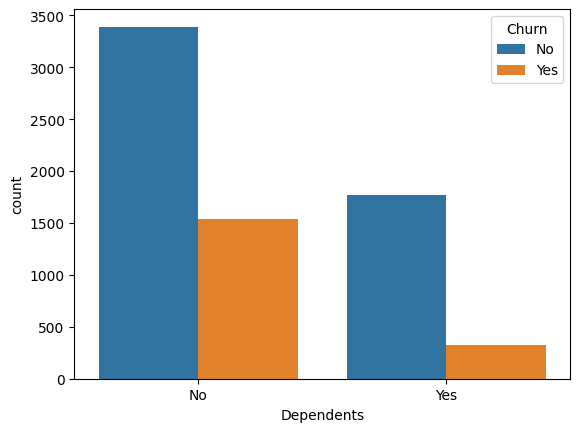

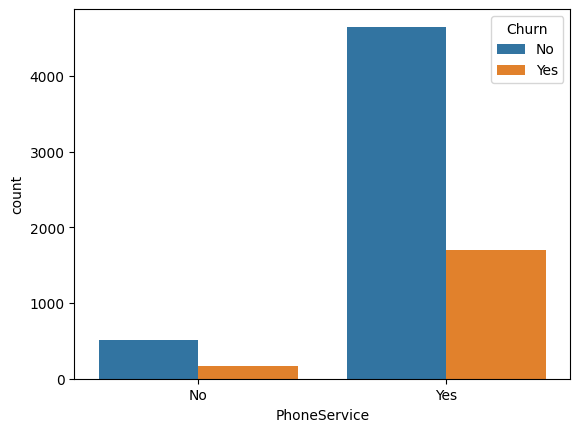

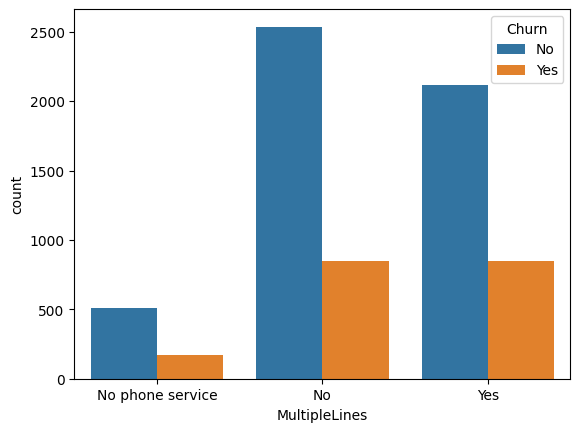

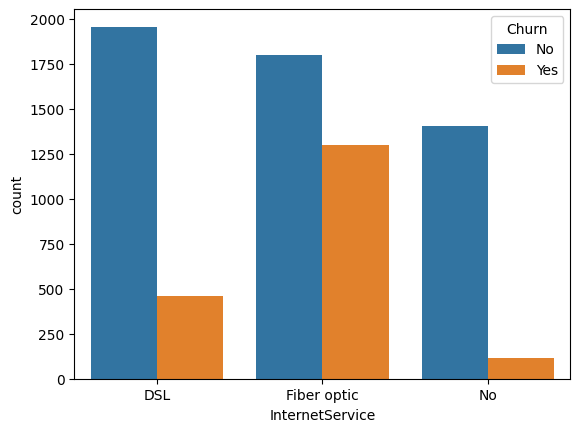

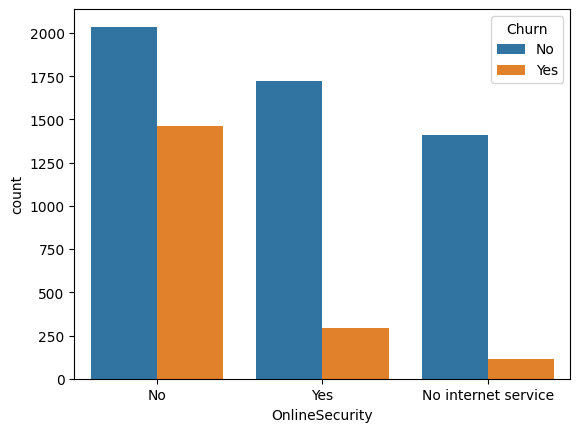

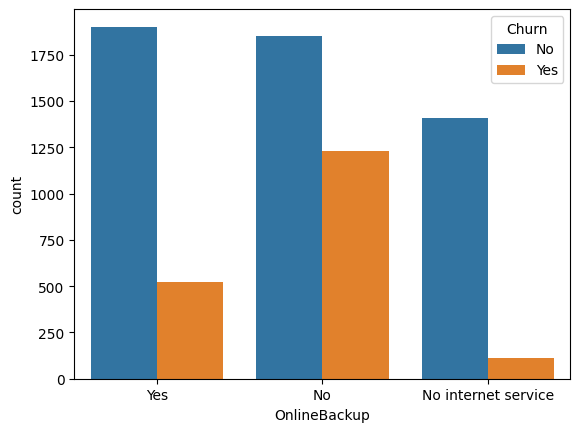

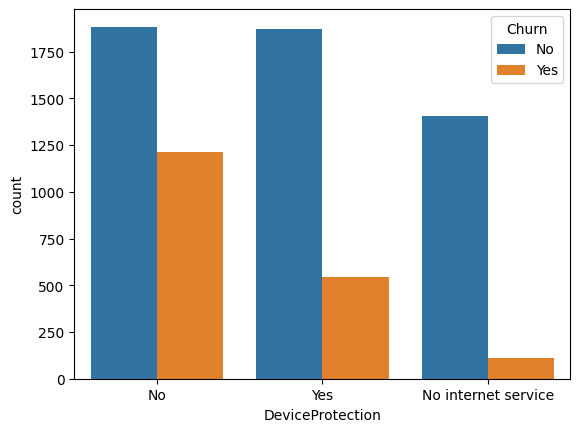

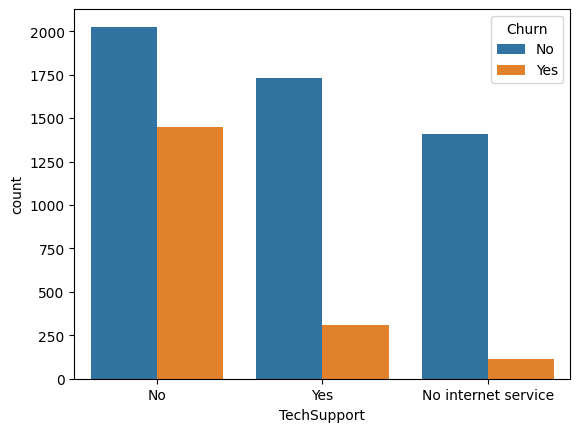

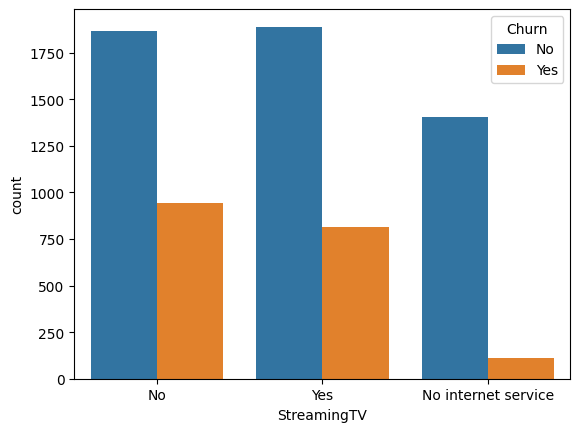

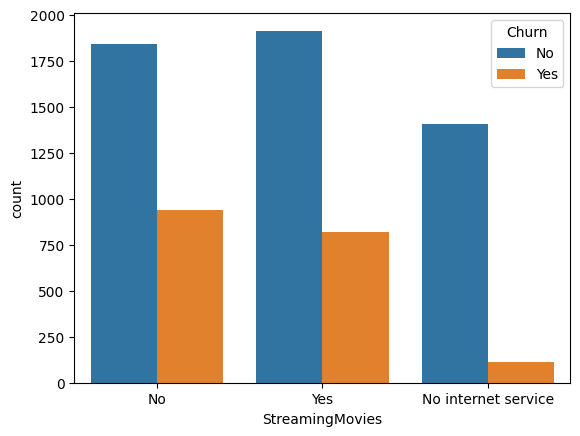

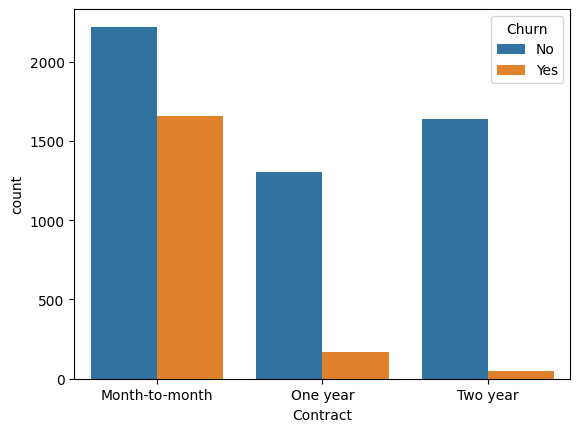

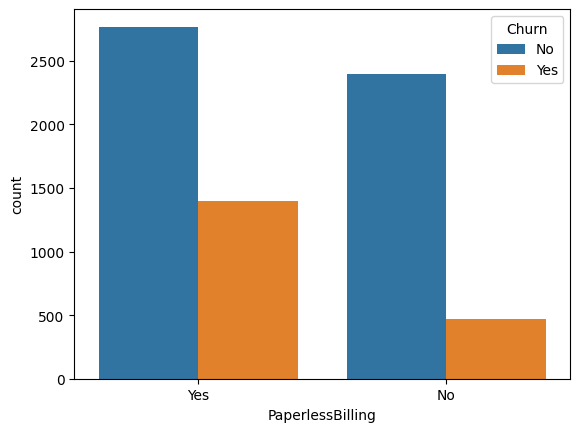

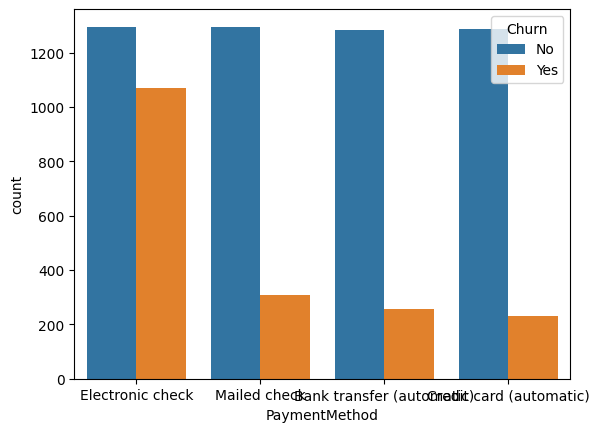

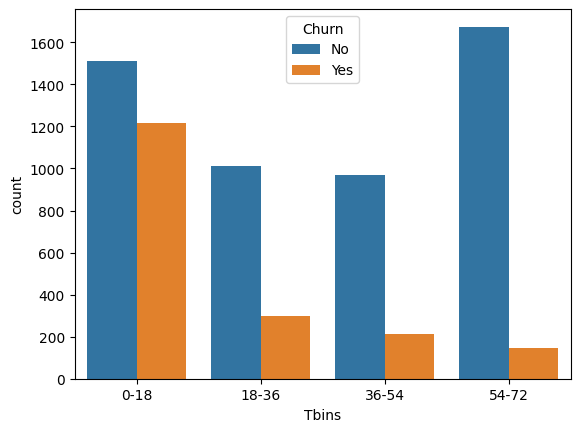

In [ ]:
#-------UNIVARIATE ANALYSIS-----------





for i,predictor in enumerate(new.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
  plt.figure(i)
  sns.countplot(data=new,x=predictor,hue='Churn')

**Those Customers who are dependents are very less likely to churn.**
**Customers who arent dependents are most likely to churn (30%)**

**Ppl having monthly contracts are churning at a rate of 41%**
**Ppl having 1yr or 2yr contract are very rarely churning**

**Ppl who pay via electronic check churn are more likely to churn (45%)**

**Gender shows no useful data to us alone.(both same)**

**SeniorCitizen are most likely to churn (40%)**

**Having No partner has a higher chances of a churning**

In [ ]:
#---------Numerical Analysis--------

new.gender.value_counts()




,count
gender,
Male,3549
Female,3483


In [ ]:
pd.crosstab(new.PaymentMethod,new.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


**CONVERT TARGET VAR "CHURN" INTO BINARY NUMERIC VAUE IE YES=1,NO=0**

In [ ]:
new['Churn']=np.where(new['Churn']=='Yes',1,0)

In [ ]:
new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tbins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-18
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,18-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-18
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,36-54
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-18


CONVERT CATEGORICAL VARIABLES INTO DUMMY VARIABLES

In [ ]:
new_dummies=pd.get_dummies(new)
new_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tbins_0-18,Tbins_18-36,Tbins_36-54,Tbins_54-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,True,False,False,True,False,True,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,True,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,True,False,False,False,False,False,True,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,False


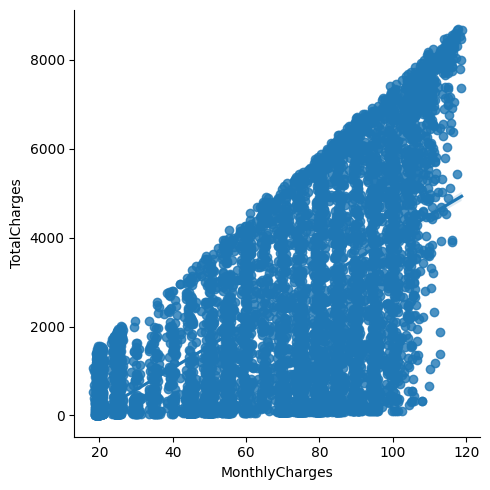

In [ ]:
# RELATIONSHIP BETWEEN MonthlyCharges & TotalCharges


sns.lmplot(data=new_dummies,x='MonthlyCharges',y='TotalCharges')

In [ ]:
new_dummies['MonthlyCharges'].corr(new_dummies['TotalCharges'])

0.6510648032262027

TOTAL CHARGES INCREASE AS MONTHLY CHARGES INCREASE - as expected

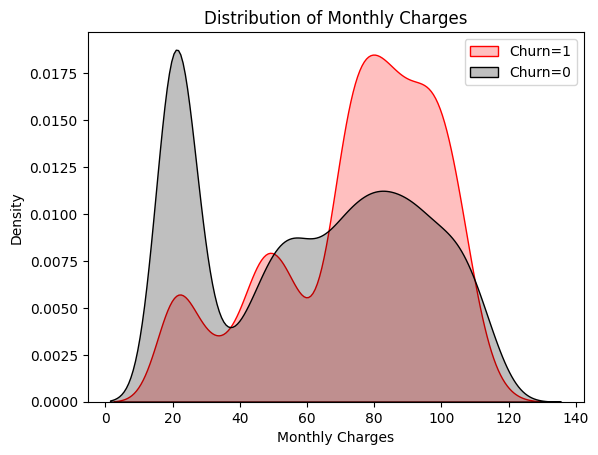

In [ ]:
mth = sns.kdeplot(new.MonthlyCharges[(new_dummies['Churn']==1)],color='red',shade=True)
mth = sns.kdeplot(new.MonthlyCharges[(new_dummies['Churn']==0)],color='black',shade=True)
mth.legend(['Churn=1','Churn=0'])
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Distribution of Monthly Charges')
plt.show()

CHURN IS HIGH WHEN MONTHLY CHARGES ARE HIGH

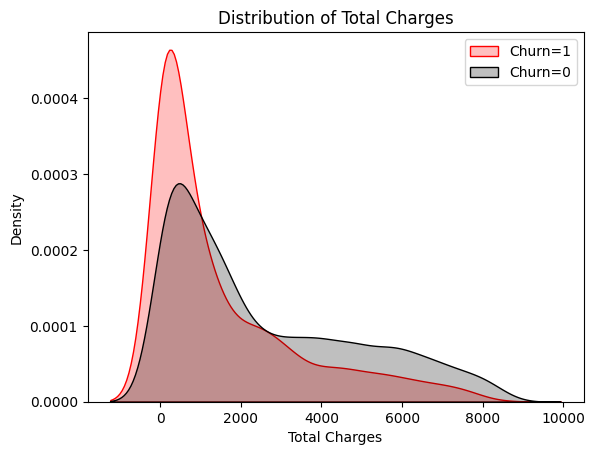

In [ ]:
mth = sns.kdeplot(new.TotalCharges[(new_dummies['Churn']==1)],color='red',shade=True)
mth = sns.kdeplot(new.TotalCharges[(new_dummies['Churn']==0)],color='black',shade=True)
mth.legend(['Churn=1','Churn=0'])
mth.set_ylabel('Density')
mth.set_xlabel('Total Charges')
mth.set_title('Distribution of Total Charges')
plt.show()

HIGHER CHURN RATE AT LOWER TotalCharges----SUPRISING INSIGHT..



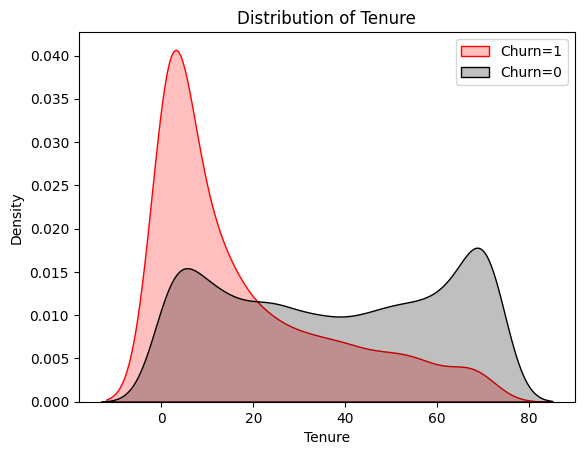

In [ ]:
mth = sns.kdeplot(df.tenure[(df['Churn']=='Yes')],color='red',shade=True)
mth = sns.kdeplot(df.tenure[(df['Churn']=='No')],color='black',shade=True)
mth.legend(['Churn=1','Churn=0'])
mth.set_ylabel('Density')
mth.set_xlabel('Tenure')
mth.set_title('Distribution of Tenure')
plt.show()

HIGHER MONTHLY CHARGE + LOWER TENURE + LOWER TOTALCHARGES RESULTS IN HIGH CHURN RATE

<Axes: >

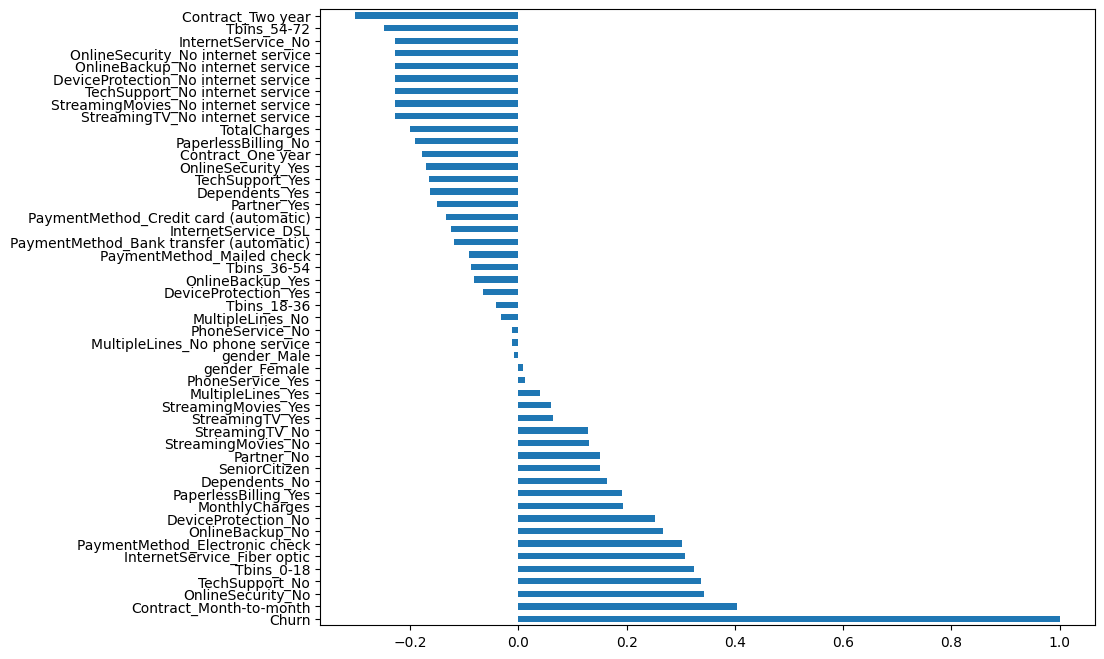

In [ ]:
plt.figure(figsize=(10,8))
new_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')

In [ ]:
#-------Bivariate Analysis

new_target0 = new.loc[new['Churn']==0]
new_target1 = new.loc[new['Churn']==1]


In [ ]:
len(new_target0)

5163

In [ ]:
len(new_target1)

1869

In [ ]:
def uniplot(df, col, title, hue=None):
    # Set plot style and context
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Create figure and axis
    temp=pd.Series(data = hue)
    fig, ax = plt.subplots()

    # Adjust figure size based on unique values in the column
    width = len(df[col].unique()) * 3 + len(temp.unique())  # Adjust the multiplier as needed
    fig.set_size_inches(width, 8)

    # Create count plot
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)

    # Set plot attributes
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)

    # Show the plot
    plt.show()

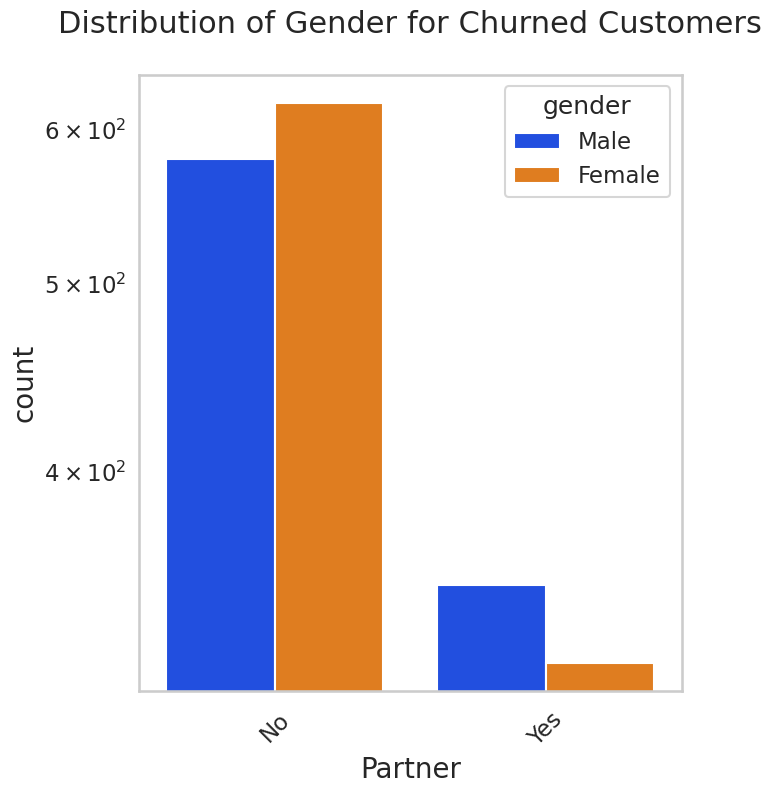

In [ ]:
uniplot(new_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

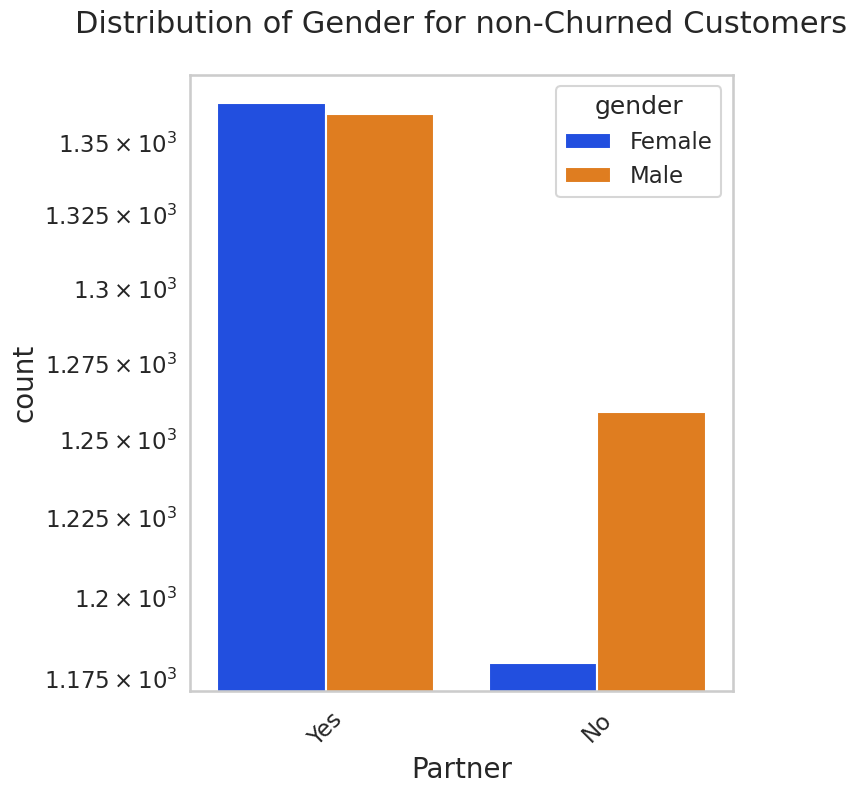

In [ ]:
uniplot(new_target0,col='Partner',title='Distribution of Gender for non-Churned Customers',hue='gender')

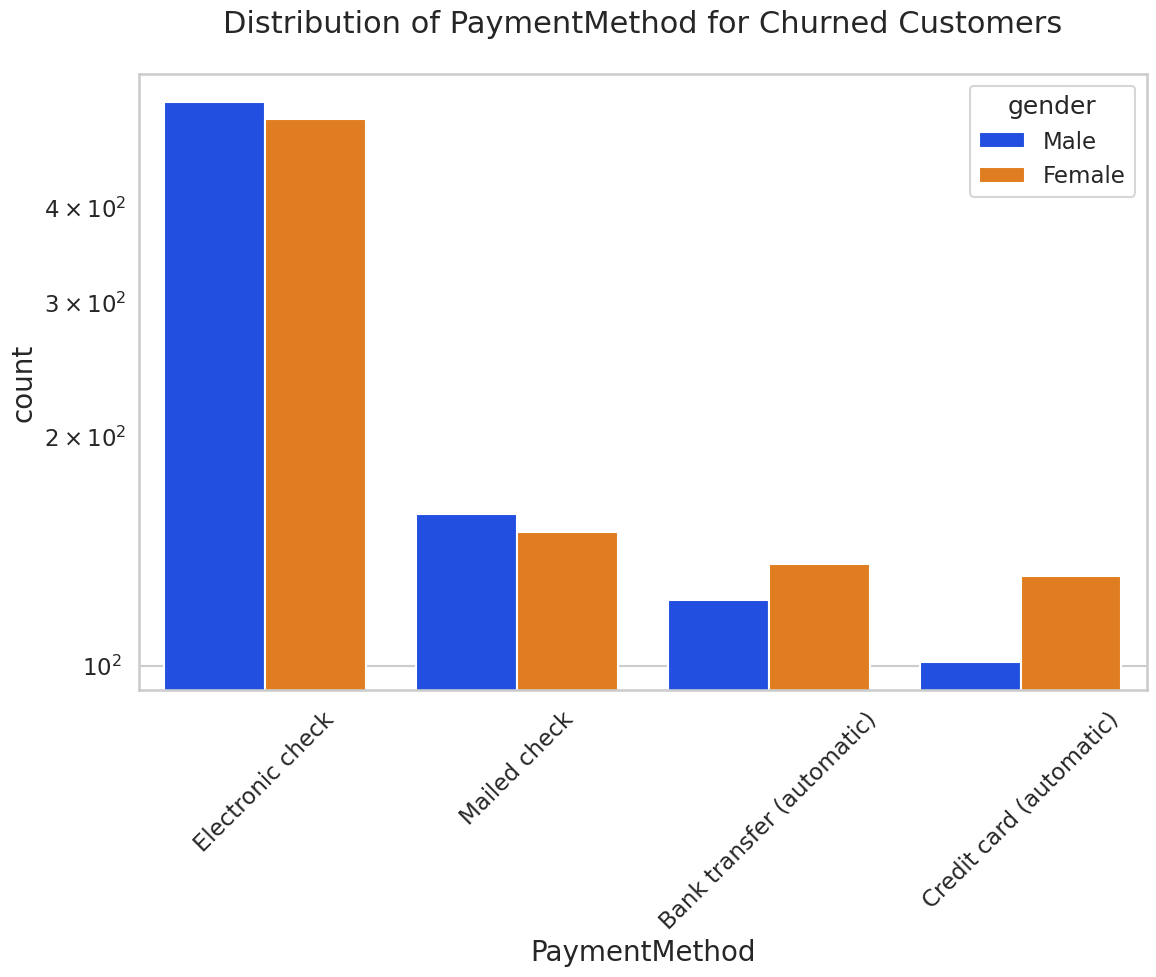

In [ ]:
uniplot(new_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

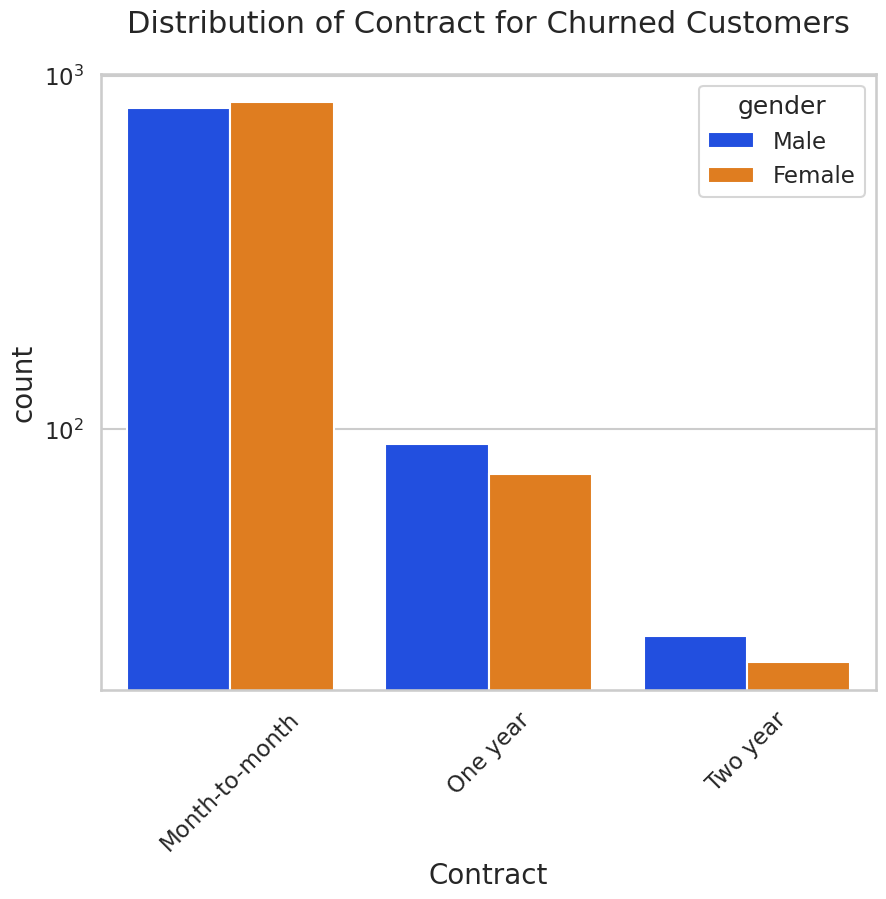

In [ ]:
uniplot(new_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

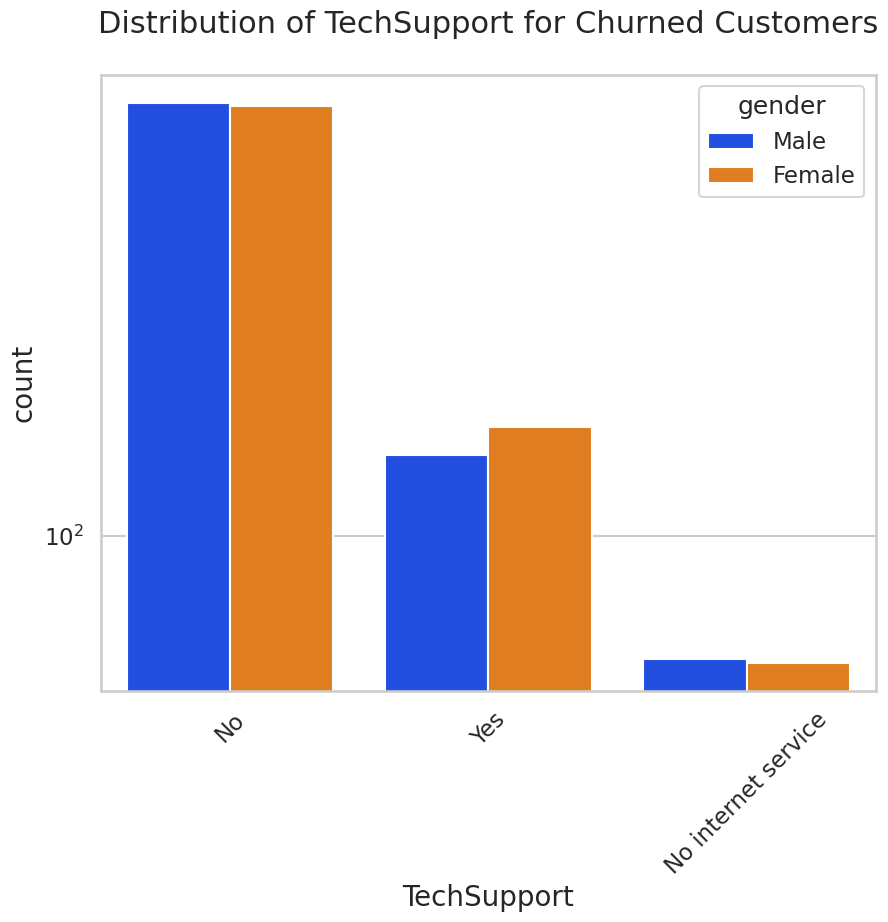

In [ ]:
uniplot(new_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

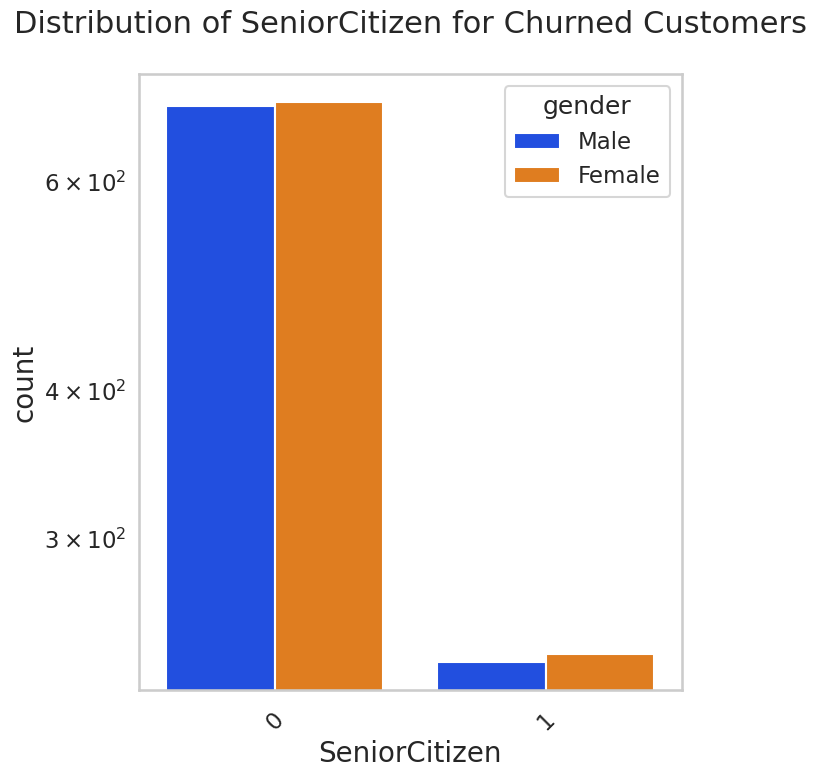

In [ ]:
uniplot(new_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

**CONCLUSION**

Electronic check medium are the highest churners.


Contract-Type -- Monthly customers are most likely to churn because of no contact terms,as they are free to go customers.

No online security . No Tech Support category are high churners.

Non senior citizens are high churners.


***ML MODEL BUILDING***

In [ ]:
new_dummies.to_csv('telecom_churn.csv')

In [ ]:
#----------PREDECTIVE ANALYSIS------------

import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# List files in the current directory
print("Files in the current directory:", os.listdir())


Current working directory: /content
Files in the current directory: ['.config', 'telecom_churn.csv', 'CustomerChurn.csv', 'sample_data']


In [ ]:
from google.colab import files

# Download the file
files.download('/content/telecom_churn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
df=pd.read_csv('/content/telecom_churn.csv')

In [ ]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tbins_0-18,Tbins_18-36,Tbins_36-54,Tbins_54-72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,True,False,True,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,True,False,False,False,False,True,False,True,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,True,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,True,False,False,False,False,False,True,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,True,False,True,False,False,False


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tbins_0-18,Tbins_18-36,Tbins_36-54,Tbins_54-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,True,False,False,True,False,True,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,True,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,True,False,False,False,False,False,True,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,False


In [ ]:
x=df.drop('Churn',axis=1)


In [ ]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tbins_0-18,Tbins_18-36,Tbins_36-54,Tbins_54-72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,True,False,False,True,False,True,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,True,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,True,False,False,True,False,True,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
y=df['Churn']

In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**DT CLASSIFIER**

In [ ]:
model = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=42)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42, splitter='random')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1021
           1       0.50      0.49      0.50       386

    accuracy                           0.73      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.72      0.73      0.73      1407



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[833 188]
 [197 189]]


In [ ]:
847+197

1044

In [ ]:
1044+183+180

1407

In [ ]:
1044/1407 * 100

74.20042643923242

**DT CLASSIFIER USING SMOTEENN------Synthetic Minority Over sampling Technique**

In [ ]:
sm = SMOTEENN()


In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x,y,test_size=0.2,random_state=42)
xr_train,yr_train = sm.fit_resample(xr_train,yr_train)

In [ ]:
model_smoteenn = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=42)

In [ ]:
model_smoteenn.fit(xr_train,yr_train)

DecisionTreeClassifier(random_state=42, splitter='random')

In [ ]:
y_pred_smoteenn = model_smoteenn.predict(xr_test)

In [ ]:
y_pred_smoteenn

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(yr_test,y_pred_smoteenn,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.68      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407



In [ ]:
print(confusion_matrix(yr_test,y_pred_smoteenn))

[[788 245]
 [121 253]]


In [ ]:
788+253

1041

In [ ]:
1041+121+233

1407

In [ ]:
round(1058/1407 * 100,2)

75.2

**DT USING ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a base decision tree classifier
base_model = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the base model
ada_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)


# Train the pipeline (SMOTE + AdaBoost)
ada_model.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the test set
y_pred_sm_ada = ada_model.predict(X_TEST)

# Evaluate the model
print(classification_report(Y_TEST, y_pred_sm_ada))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
print(confusion_matrix(Y_TEST, y_pred_sm_ada))

[[1382  167]
 [ 262  299]]


In [ ]:
1382+299

1681

In [ ]:
1681+167+262

2110

In [ ]:
round(1681/2110 * 100,2)

79.67

**RF CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)

In [ ]:
modelrf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = model.predict(x_test)

In [ ]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1021
           1       0.50      0.49      0.50       386

    accuracy                           0.73      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.72      0.73      0.73      1407



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[833 188]
 [197 189]]


In [ ]:
833+189

1022

In [ ]:
1022+197+188

1407

In [ ]:
round(1022/1407 * 100,2)

72.64

**RF USING SMOTEENN**

In [ ]:
sm = SMOTEENN()



In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_resampled_rf,y_resampled_rf = sm.fit_resample(xr_train,yr_train)

In [ ]:
model_smoteenn_rf = RandomForestClassifier(criterion='gini',random_state=42)


In [ ]:
model_smoteenn_rf.fit(x_resampled_rf,y_resampled_rf)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_smoteenn_rf = model_smoteenn_rf.predict(xr_test)


In [ ]:
y_pred_smoteenn_rf


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(yr_test,y_pred_smoteenn_rf,labels=[0,1]))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [ ]:
print(confusion_matrix(yr_test,y_pred_smoteenn_rf))

[[781 252]
 [100 274]]


In [ ]:
781+274

1055

In [ ]:
1055+252+100

1407

In [ ]:
round(1055/1407 * 100,2)

74.98

In [ ]:
import pickle

In [ ]:

filenam='ADA_model.sav'

pickle.dump(ada_model,open(filenam,'wb'))

In [ ]:
load_model = pickle.load(open(filenam,'rb'))

In [ ]:
load_model.score(X_TEST,Y_TEST)

0.7966824644549763